In [1]:
from tools.Simulate import Simulate
sac = Simulate()
sac.create_master_df()
sac.generate_ac_data()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_pickle("data/master_dataframe.pkl")
healthy = data[data[0]==0].iloc[:,1:]
faulty = data[data[0]==1].iloc[:,1:]

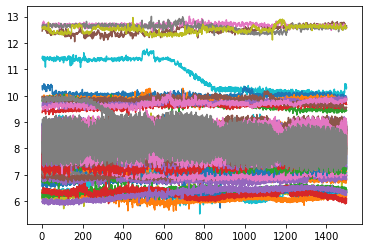

In [4]:
for i in range(12,len(healthy)):
    plt.plot(healthy.iloc[i, :1500])

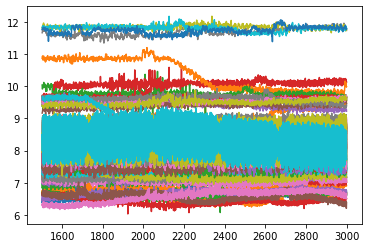

In [5]:
for i in range(len(healthy)):
    plt.plot(healthy.iloc[i, 1500:3000])

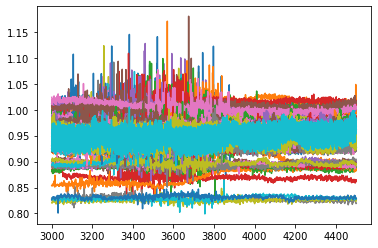

In [6]:
for i in range(len(healthy)):
    plt.plot(healthy.iloc[i, 3000:])

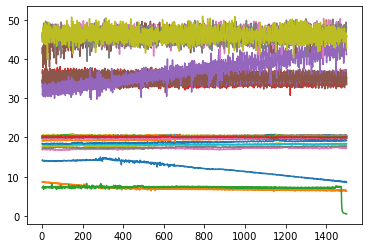

In [7]:
for i in range(len(faulty)):
    plt.plot(faulty.iloc[i, :1500])

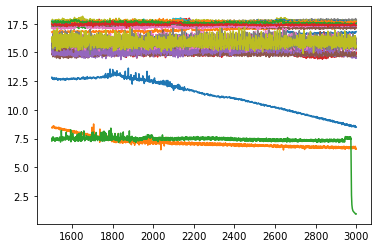

In [8]:
for i in range(len(faulty)):
    plt.plot(faulty.iloc[i, 1500:3000])

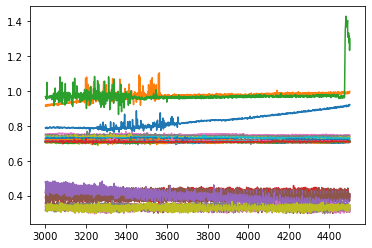

In [9]:
for i in range(len(faulty)):
    plt.plot(faulty.iloc[i, 3000:])

In [10]:
normalized_df = (data - data.min()) / (data.max() - data.min())
healthy = normalized_df[normalized_df[0]==0].iloc[:,1:]
faulty = normalized_df[normalized_df[0]==1].iloc[:,1:]

In [11]:
healthy.head()

,1,2,3,4,5,6,7,8,9,10,...,4491,4492,4493,4494,4495,4496,4497,4498,4499,4500
0,0.043610,0.038774,0.041471,0.039689,0.035991,0.042118,0.038358,0.038401,0.038854,0.037560,...,0.625431,0.628763,0.625321,0.607268,0.630473,0.646311,0.627089,0.632952,0.671142,0.642438
1,0.059100,0.055068,0.054049,0.059615,0.048634,0.057225,0.055987,0.049310,0.057706,0.050436,...,0.586128,0.585112,0.582858,0.561089,0.582279,0.604604,0.574381,0.589600,0.638149,0.591443
2,0.091703,0.091003,0.091521,0.091742,0.083476,0.088410,0.093616,0.081972,0.087124,0.091986,...,0.577014,0.567333,0.564770,0.557303,0.568953,0.586644,0.570920,0.579590,0.619401,0.583111
3,0.095810,0.102685,0.096429,0.095149,0.097506,0.097973,0.096096,0.091598,0.096363,0.094649,...,0.553496,0.544531,0.547622,0.530632,0.541121,0.566591,0.548068,0.555718,0.596306,0.561944
4,0.034912,0.029956,0.032222,0.032953,0.029930,0.033715,0.030624,0.028945,0.031490,0.029771,...,0.644374,0.644012,0.645616,0.626545,0.646275,0.668507,0.644541,0.651699,0.705052,0.661949


In [12]:
faulty.head()

,1,2,3,4,5,6,7,8,9,10,...,4491,4492,4493,4494,4495,4496,4497,4498,4499,4500
60,0.202234,0.201644,0.198198,0.195866,0.192122,0.192465,0.197871,0.184884,0.190260,0.198873,...,0.601944,0.600652,0.604284,0.587692,0.596879,0.622957,0.602815,0.613103,0.656827,0.619860
61,0.064734,0.064525,0.063933,0.063324,0.060694,0.062033,0.067318,0.058173,0.062752,0.066198,...,0.677192,0.676404,0.670074,0.664746,0.674175,0.699639,0.679409,0.684003,0.737616,0.696267
62,0.030191,0.034753,0.031694,0.032466,0.034037,0.029874,0.040940,0.016086,0.030465,0.034594,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
63,0.747629,0.769088,0.764142,0.689564,0.718721,0.721191,0.660233,0.662511,0.666715,0.721918,...,0.100665,0.114550,0.086526,0.074206,0.072277,0.059161,0.069819,0.095551,0.084452,0.101110
64,0.663853,0.704694,0.706442,0.709614,0.727115,0.702125,0.680982,0.655686,0.618865,0.685200,...,0.101212,0.107724,0.088244,0.077424,0.073928,0.061976,0.048314,0.069685,0.074502,0.101180


0.35965476888018477
0.3746621500008002
0.39370724865306206
0.40427141815810563
0.34943312191350345
0.3542815996020181
0.3579703902243429
0.3597705812875519
0.3543249412153169
0.352860516902034
0.3490230162748984
0.3374573465745727
0.3409931374625889
0.34219863826692326
0.3416178306899661
0.3432746849047322
0.3410137384854471
0.3426051317478863
0.3432337927881701
0.3460995798984908
0.336550909633837
0.33609639656847207
0.33619297670803366
0.33156924036148266
0.3351129340377707
0.33222542705180846
0.33205066214573264
0.4471158465461632
0.45201983599599616
0.451859153165708
0.4503204798254118
0.41573885523885074
0.40030804620396826
0.39648112948690517
0.39104554064989006
0.3898864044995762
0.39440328754667253
0.396349130380736
0.3937537219219338
0.37970911078191466
0.3774636181557524
0.37778128841839653
0.3773210359045362
0.37237358195846915
0.3749496875177583
0.3760586496692299
0.3783657576766035
0.3776907274853716
0.3779040288503897
0.3768701306992717
0.37170708202482666
0.3691530061820

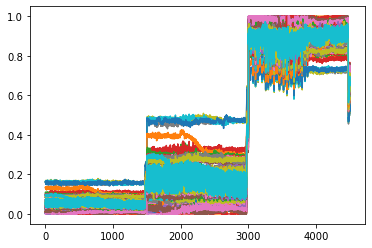

In [13]:
for i in range(len(healthy)):
    print(np.mean(healthy.iloc[i, :]))
    plt.plot(healthy.iloc[i, :])

0.4348679342898645
0.33994915884413285
0.3479975084043708
0.523327027376349
0.5234366650025596
0.5232696289500928
0.5514576207772942
0.5599341737137232
0.5713106521919684
0.5753466400150078
0.5881641546801732
0.6049443558869046
0.6206200502034354
0.62732748146337
0.6221813004173079
0.6130214246290994
0.6129512961239117
0.6258834602719536
0.6299721282809236
0.6251046483787962
0.6259647106249635
0.627189065161506
0.6246730045503914
0.6187138940168533
0.5460160754785914
0.6032273804953786
0.6061043173684898
0.6046419915295314
0.6056304460302417


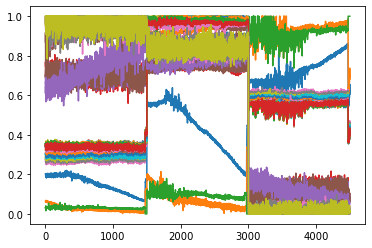

In [14]:
for i in range(len(faulty)):
    print(np.mean(faulty.iloc[i, :]))
    plt.plot(faulty.iloc[i, :])